<a href="https://colab.research.google.com/github/QidiLiu/Simulation_LIA/blob/main/Simulation_LIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
from math import floor

In [2]:
def plot_sig(sig, title):
    plt.plot(t, sig)
    plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

## Amplitudenmodulation

### moduliertes Signal

$$c(t) = A\cdot sin(2\pi f_c t)$$
$$m(t) = sinc(\omega_m t) + 1$$
$$y(t) = m(t)\cdot c(t) = [sinc(\omega_m t) + 1]\cdot A\cdot sin(2\pi f_c t)$$


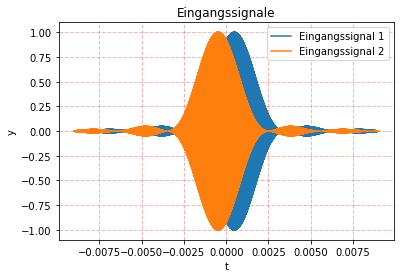

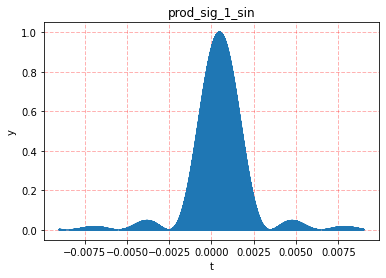

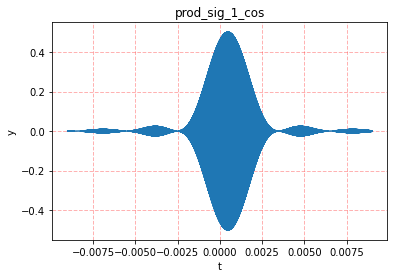

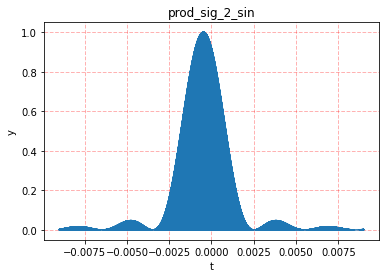

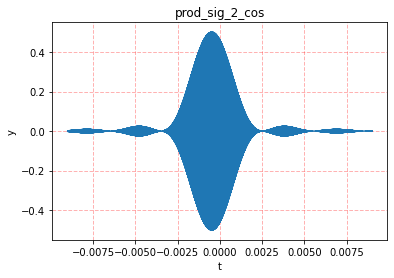

In [3]:
#----------------------------------
# Parameter für Amplitudenmodulation
#----------------------------------
# Trägersignal
freq = 200000
omega = 2*np.pi * freq
T = 1/freq

# Modulationssignal
T_m = 0.003 # "Periode" der Sinc-funktion
omega_m = 2*np.pi * (1/T_m)
verschob_phase = 1

# Parameter von Sample
freq_sample = 125000000
step = 1/freq_sample

#----------------------------------
# Moduliertes Signal
#----------------------------------
t = np.arange(-3*T_m, 3*T_m, step) # Sample
z1 = omega_m*t - verschob_phase
z2 = omega_m*t + verschob_phase
sig_1 = 1* (np.sin(z1/2)/(z1/2))**2 * np.sin(2*np.pi*freq*t)
sig_2 = (np.sin(z2/2)/(z2/2))**2 * np.sin(2*np.pi*freq*t) # moduliertes Signal mit verschoben Phasen
plt.plot(t, sig_1, label='Eingangssignal 1')
plt.plot(t, sig_2, label='Eingangssignal 2')
plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Eingangssignale')
plt.show()

#----------------------------------
# Mixer
#----------------------------------
prod_sig_1_sin = sig_1 * np.sin(omega*t)
prod_sig_1_cos = sig_1 * np.cos(omega*t)
prod_sig_2_sin = sig_2 * np.sin(omega*t)
prod_sig_2_cos = sig_2 * np.cos(omega*t)
plot_sig(prod_sig_1_sin, 'prod_sig_1_sin')
plot_sig(prod_sig_1_cos, 'prod_sig_1_cos')
plot_sig(prod_sig_2_sin, 'prod_sig_2_sin')
plot_sig(prod_sig_2_cos, 'prod_sig_2_cos')

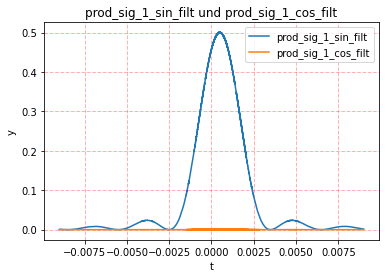

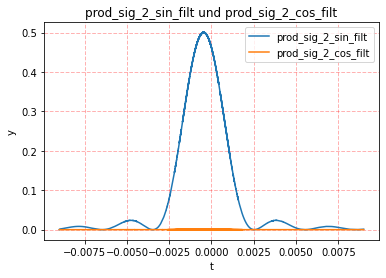

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


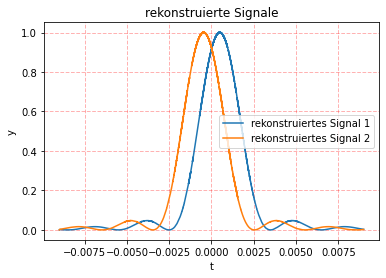

In [4]:
#----------------------------------
# Tiefpassfilter
#----------------------------------

# Signal filtern
coe = np.array([0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000063,0.000063,0.000063,0.000063,0.000063,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000065,0.000065,0.000065,0.000065,0.000065,0.000066,0.000066,0.000066,0.000066,0.000066,0.000067,0.000067,0.000067,0.000067,0.000067,0.000068,0.000068,0.000068,0.000068,0.000069,0.000069,0.000069,0.000069,0.000069,0.000070,0.000070,0.000070,0.000070,0.000071,0.000071,0.000071,0.000071,0.000071,0.000072,0.000072,0.000072,0.000072,0.000073,0.000073,0.000073,0.000073,0.000074,0.000074,0.000074,0.000074,0.000075,0.000075,0.000075,0.000075,0.000076,0.000076,0.000076,0.000076,0.000077,0.000077,0.000077,0.000077,0.000078,0.000078,0.000078,0.000079,0.000079,0.000079,0.000079,0.000080,0.000080,0.000080,0.000080,0.000081,0.000081,0.000081,0.000082,0.000082,0.000082,0.000082,0.000083,0.000083,0.000083,0.000084,0.000084,0.000084,0.000085,0.000085,0.000085,0.000085,0.000086,0.000086,0.000086,0.000087,0.000087,0.000087,0.000088,0.000088,0.000088,0.000089,0.000089,0.000089,0.000090,0.000090,0.000090,0.000090,0.000091,0.000091,0.000091,0.000092,0.000092,0.000092,0.000093,0.000093,0.000093,0.000094,0.000094,0.000094,0.000095,0.000095,0.000095,0.000096,0.000096,0.000097,0.000097,0.000097,0.000098,0.000098,0.000098,0.000099,0.000099,0.000099,0.000100,0.000100,0.000100,0.000101,0.000101,0.000102,0.000102,0.000102,0.000103,0.000103,0.000103,0.000104,0.000104,0.000104,0.000105,0.000105,0.000106,0.000106,0.000106,0.000107,0.000107,0.000108,0.000108,0.000108,0.000109,0.000109,0.000109,0.000110,0.000110,0.000111,0.000111,0.000111,0.000112,0.000112,0.000113,0.000113,0.000113,0.000114,0.000114,0.000115,0.000115,0.000115,0.000116,0.000116,0.000117,0.000117,0.000117,0.000118,0.000118,0.000119,0.000119,0.000120,0.000120,0.000120,0.000121,0.000121,0.000122,0.000122,0.000123,0.000123,0.000123,0.000124,0.000124,0.000125,0.000125,0.000126,0.000126,0.000126,0.000127,0.000127,0.000128,0.000128,0.000129,0.000129,0.000129,0.000130,0.000130,0.000131,0.000131,0.000132,0.000132,0.000133,0.000133,0.000134,0.000134,0.000134,0.000135,0.000135,0.000136,0.000136,0.000137,0.000137,0.000138,0.000138,0.000139,0.000139,0.000140,0.000140,0.000140,0.000141,0.000141,0.000142,0.000142,0.000143,0.000143,0.000144,0.000144,0.000145,0.000145,0.000146,0.000146,0.000147,0.000147,0.000148,0.000148,0.000149,0.000149,0.000150,0.000150,0.000151,0.000151,0.000152,0.000152,0.000153,0.000153,0.000154,0.000154,0.000155,0.000155,0.000156,0.000156,0.000157,0.000157,0.000158,0.000158,0.000159,0.000159,0.000160,0.000160,0.000161,0.000161,0.000162,0.000162,0.000163,0.000163,0.000164,0.000164,0.000165,0.000165,0.000166,0.000166,0.000167,0.000167,0.000168,0.000168,0.000169,0.000169,0.000170,0.000170,0.000171,0.000172,0.000172,0.000173,0.000173,0.000174,0.000174,0.000175,0.000175,0.000176,0.000176,0.000177,0.000177,0.000178,0.000178,0.000179,0.000180,0.000180,0.000181,0.000181,0.000182,0.000182,0.000183,0.000183,0.000184,0.000184,0.000185,0.000186,0.000186,0.000187,0.000187,0.000188,0.000188,0.000189,0.000189,0.000190,0.000191,0.000191,0.000192,0.000192,0.000193,0.000193,0.000194,0.000195,0.000195,0.000196,0.000196,0.000197,0.000197,0.000198,0.000199,0.000199,0.000200,0.000200,0.000201,0.000201,0.000202,0.000203,0.000203,0.000204,0.000204,0.000205,0.000205,0.000206,0.000207,0.000207,0.000208,0.000208,0.000209,0.000209,0.000210,0.000211,0.000211,0.000212,0.000212,0.000213,0.000214,0.000214,0.000215,0.000215,0.000216,0.000217,0.000217,0.000218,0.000218,0.000219,0.000219,0.000220,0.000221,0.000221,0.000222,0.000222,0.000223,0.000224,0.000224,0.000225,0.000225,0.000226,0.000227,0.000227,0.000228,0.000228,0.000229,0.000230,0.000230,0.000231,0.000232,0.000232,0.000233,0.000233,0.000234,0.000235,0.000235,0.000236,0.000236,0.000237,0.000238,0.000238,0.000239,0.000239,0.000240,0.000241,0.000241,0.000242,0.000243,0.000243,0.000244,0.000244,0.000245,0.000246,0.000246,0.000247,0.000248,0.000248,0.000249,0.000249,0.000250,0.000251,0.000251,0.000252,0.000252,0.000253,0.000254,0.000254,0.000255,0.000256,0.000256,0.000257,0.000258,0.000258,0.000259,0.000259,0.000260,0.000261,0.000261,0.000262,0.000263,0.000263,0.000264,0.000264,0.000265,0.000266,0.000266,0.000267,0.000268,0.000268,0.000269,0.000270,0.000270,0.000271,0.000271,0.000272,0.000273,0.000273,0.000274,0.000275,0.000275,0.000276,0.000277,0.000277,0.000278,0.000279,0.000279,0.000280,0.000280,0.000281,0.000282,0.000282,0.000283,0.000284,0.000284,0.000285,0.000286,0.000286,0.000287,0.000288,0.000288,0.000289,0.000290,0.000290,0.000291,0.000291,0.000292,0.000293,0.000293,0.000294,0.000295,0.000295,0.000296,0.000297,0.000297,0.000298,0.000299,0.000299,0.000300,0.000301,0.000301,0.000302,0.000303,0.000303,0.000304,0.000305,0.000305,0.000306,0.000306,0.000307,0.000308,0.000308,0.000309,0.000310,0.000310,0.000311,0.000312,0.000312,0.000313,0.000314,0.000314,0.000315,0.000316,0.000316,0.000317,0.000318,0.000318,0.000319,0.000320,0.000320,0.000321,0.000322,0.000322,0.000323,0.000324,0.000324,0.000325,0.000326,0.000326,0.000327,0.000328,0.000328,0.000329,0.000330,0.000330,0.000331,0.000332,0.000332,0.000333,0.000334,0.000334,0.000335,0.000336,0.000336,0.000337,0.000338,0.000338,0.000339,0.000339,0.000340,0.000341,0.000341,0.000342,0.000343,0.000343,0.000344,0.000345,0.000345,0.000346,0.000347,0.000347,0.000348,0.000349,0.000349,0.000350,0.000351,0.000351,0.000352,0.000353,0.000353,0.000354,0.000355,0.000355,0.000356,0.000357,0.000357,0.000358,0.000359,0.000359,0.000360,0.000361,0.000361,0.000362,0.000363,0.000363,0.000364,0.000365,0.000365,0.000366,0.000367,0.000367,0.000368,0.000369,0.000369,0.000370,0.000371,0.000371,0.000372,0.000373,0.000373,0.000374,0.000375,0.000375,0.000376,0.000377,0.000377,0.000378,0.000379,0.000379,0.000380,0.000381,0.000381,0.000382,0.000383,0.000383,0.000384,0.000385,0.000385,0.000386,0.000387,0.000387,0.000388,0.000389,0.000389,0.000390,0.000390,0.000391,0.000392,0.000392,0.000393,0.000394,0.000394,0.000395,0.000396,0.000396,0.000397,0.000398,0.000398,0.000399,0.000400,0.000400,0.000401,0.000402,0.000402,0.000403,0.000404,0.000404,0.000405,0.000406,0.000406,0.000407,0.000408,0.000408,0.000409,0.000409,0.000410,0.000411,0.000411,0.000412,0.000413,0.000413,0.000414,0.000415,0.000415,0.000416,0.000417,0.000417,0.000418,0.000419,0.000419,0.000420,0.000420,0.000421,0.000422,0.000422,0.000423,0.000424,0.000424,0.000425,0.000426,0.000426,0.000427,0.000428,0.000428,0.000429,0.000430,0.000430,0.000431,0.000431,0.000432,0.000433,0.000433,0.000434,0.000435,0.000435,0.000436,0.000437,0.000437,0.000438,0.000438,0.000439,0.000440,0.000440,0.000441,0.000442,0.000442,0.000443,0.000444,0.000444,0.000445,0.000445,0.000446,0.000447,0.000447,0.000448,0.000449,0.000449,0.000450,0.000450,0.000451,0.000452,0.000452,0.000453,0.000454,0.000454,0.000455,0.000455,0.000456,0.000457,0.000457,0.000458,0.000459,0.000459,0.000460,0.000460,0.000461,0.000462,0.000462,0.000463,0.000463,0.000464,0.000465,0.000465,0.000466,0.000467,0.000467,0.000468,0.000468,0.000469,0.000470,0.000470,0.000471,0.000471,0.000472,0.000473,0.000473,0.000474,0.000474,0.000475,0.000476,0.000476,0.000477,0.000478,0.000478,0.000479,0.000479,0.000480,0.000481,0.000481,0.000482,0.000482,0.000483,0.000484,0.000484,0.000485,0.000485,0.000486,0.000486,0.000487,0.000488,0.000488,0.000489,0.000489,0.000490,0.000491,0.000491,0.000492,0.000492,0.000493,0.000494,0.000494,0.000495,0.000495,0.000496,0.000496,0.000497,0.000498,0.000498,0.000499,0.000499,0.000500,0.000501,0.000501,0.000502,0.000502,0.000503,0.000503,0.000504,0.000505,0.000505,0.000506,0.000506,0.000507,0.000507,0.000508,0.000509,0.000509,0.000510,0.000510,0.000511,0.000511,0.000512,0.000512,0.000513,0.000514,0.000514,0.000515,0.000515,0.000516,0.000516,0.000517,0.000517,0.000518,0.000519,0.000519,0.000520,0.000520,0.000521,0.000521,0.000522,0.000522,0.000523,0.000524,0.000524,0.000525,0.000525,0.000526,0.000526,0.000527,0.000527,0.000528,0.000528,0.000529,0.000529,0.000530,0.000531,0.000531,0.000532,0.000532,0.000533,0.000533,0.000534,0.000534,0.000535,0.000535,0.000536,0.000536,0.000537,0.000537,0.000538,0.000538,0.000539,0.000539,0.000540,0.000541,0.000541,0.000542,0.000542,0.000543,0.000543,0.000544,0.000544,0.000545,0.000545,0.000546,0.000546,0.000547,0.000547,0.000548,0.000548,0.000549,0.000549,0.000550,0.000550,0.000551,0.000551,0.000552,0.000552,0.000553,0.000553,0.000554,0.000554,0.000555,0.000555,0.000556,0.000556,0.000557,0.000557,0.000558,0.000558,0.000558,0.000559,0.000559,0.000560,0.000560,0.000561,0.000561,0.000562,0.000562,0.000563,0.000563,0.000564,0.000564,0.000565,0.000565,0.000566,0.000566,0.000567,0.000567,0.000567,0.000568,0.000568,0.000569,0.000569,0.000570,0.000570,0.000571,0.000571,0.000572,0.000572,0.000572,0.000573,0.000573,0.000574,0.000574,0.000575,0.000575,0.000576,0.000576,0.000576,0.000577,0.000577,0.000578,0.000578,0.000579,0.000579,0.000580,0.000580,0.000580,0.000581,0.000581,0.000582,0.000582,0.000583,0.000583,0.000583,0.000584,0.000584,0.000585,0.000585,0.000585,0.000586,0.000586,0.000587,0.000587,0.000588,0.000588,0.000588,0.000589,0.000589,0.000590,0.000590,0.000590,0.000591,0.000591,0.000592,0.000592,0.000592,0.000593,0.000593,0.000594,0.000594,0.000594,0.000595,0.000595,0.000596,0.000596,0.000596,0.000597,0.000597,0.000597,0.000598,0.000598,0.000599,0.000599,0.000599,0.000600,0.000600,0.000600,0.000601,0.000601,0.000602,0.000602,0.000602,0.000603,0.000603,0.000603,0.000604,0.000604,0.000604,0.000605,0.000605,0.000606,0.000606,0.000606,0.000607,0.000607,0.000607,0.000608,0.000608,0.000608,0.000609,0.000609,0.000609,0.000610,0.000610,0.000610,0.000611,0.000611,0.000611,0.000612,0.000612,0.000612,0.000613,0.000613,0.000613,0.000614,0.000614,0.000614,0.000615,0.000615,0.000615,0.000616,0.000616,0.000616,0.000617,0.000617,0.000617,0.000618,0.000618,0.000618,0.000618,0.000619,0.000619,0.000619,0.000620,0.000620,0.000620,0.000621,0.000621,0.000621,0.000621,0.000622,0.000622,0.000622,0.000623,0.000623,0.000623,0.000623,0.000624,0.000624,0.000624,0.000625,0.000625,0.000625,0.000625,0.000626,0.000626,0.000626,0.000626,0.000627,0.000627,0.000627,0.000628,0.000628,0.000628,0.000628,0.000629,0.000629,0.000629,0.000629,0.000630,0.000630,0.000630,0.000630,0.000631,0.000631,0.000631,0.000631,0.000632,0.000632,0.000632,0.000632,0.000632,0.000633,0.000633,0.000633,0.000633,0.000634,0.000634,0.000634,0.000634,0.000635,0.000635,0.000635,0.000635,0.000635,0.000636,0.000636,0.000636,0.000636,0.000637,0.000637,0.000637,0.000637,0.000637,0.000638,0.000638,0.000638,0.000638,0.000638,0.000639,0.000639,0.000639,0.000639,0.000639,0.000640,0.000640,0.000640,0.000640,0.000640,0.000640,0.000641,0.000641,0.000641,0.000641,0.000641,0.000642,0.000642,0.000642,0.000642,0.000642,0.000642,0.000643,0.000643,0.000643,0.000643,0.000643,0.000643,0.000644,0.000644,0.000644,0.000644,0.000644,0.000644,0.000644,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000646,0.000646,0.000646,0.000646,0.000646,0.000646,0.000646,0.000646,0.000647,0.000647,0.000647,0.000647,0.000647,0.000647,0.000647,0.000647,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000652,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000651,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000650,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000649,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000648,0.000647,0.000647,0.000647,0.000647,0.000647,0.000647,0.000647,0.000647,0.000646,0.000646,0.000646,0.000646,0.000646,0.000646,0.000646,0.000646,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000645,0.000644,0.000644,0.000644,0.000644,0.000644,0.000644,0.000644,0.000643,0.000643,0.000643,0.000643,0.000643,0.000643,0.000642,0.000642,0.000642,0.000642,0.000642,0.000642,0.000641,0.000641,0.000641,0.000641,0.000641,0.000640,0.000640,0.000640,0.000640,0.000640,0.000640,0.000639,0.000639,0.000639,0.000639,0.000639,0.000638,0.000638,0.000638,0.000638,0.000638,0.000637,0.000637,0.000637,0.000637,0.000637,0.000636,0.000636,0.000636,0.000636,0.000635,0.000635,0.000635,0.000635,0.000635,0.000634,0.000634,0.000634,0.000634,0.000633,0.000633,0.000633,0.000633,0.000632,0.000632,0.000632,0.000632,0.000632,0.000631,0.000631,0.000631,0.000631,0.000630,0.000630,0.000630,0.000630,0.000629,0.000629,0.000629,0.000629,0.000628,0.000628,0.000628,0.000628,0.000627,0.000627,0.000627,0.000626,0.000626,0.000626,0.000626,0.000625,0.000625,0.000625,0.000625,0.000624,0.000624,0.000624,0.000623,0.000623,0.000623,0.000623,0.000622,0.000622,0.000622,0.000621,0.000621,0.000621,0.000621,0.000620,0.000620,0.000620,0.000619,0.000619,0.000619,0.000618,0.000618,0.000618,0.000618,0.000617,0.000617,0.000617,0.000616,0.000616,0.000616,0.000615,0.000615,0.000615,0.000614,0.000614,0.000614,0.000613,0.000613,0.000613,0.000612,0.000612,0.000612,0.000611,0.000611,0.000611,0.000610,0.000610,0.000610,0.000609,0.000609,0.000609,0.000608,0.000608,0.000608,0.000607,0.000607,0.000607,0.000606,0.000606,0.000606,0.000605,0.000605,0.000604,0.000604,0.000604,0.000603,0.000603,0.000603,0.000602,0.000602,0.000602,0.000601,0.000601,0.000600,0.000600,0.000600,0.000599,0.000599,0.000599,0.000598,0.000598,0.000597,0.000597,0.000597,0.000596,0.000596,0.000596,0.000595,0.000595,0.000594,0.000594,0.000594,0.000593,0.000593,0.000592,0.000592,0.000592,0.000591,0.000591,0.000590,0.000590,0.000590,0.000589,0.000589,0.000588,0.000588,0.000588,0.000587,0.000587,0.000586,0.000586,0.000585,0.000585,0.000585,0.000584,0.000584,0.000583,0.000583,0.000583,0.000582,0.000582,0.000581,0.000581,0.000580,0.000580,0.000580,0.000579,0.000579,0.000578,0.000578,0.000577,0.000577,0.000576,0.000576,0.000576,0.000575,0.000575,0.000574,0.000574,0.000573,0.000573,0.000572,0.000572,0.000572,0.000571,0.000571,0.000570,0.000570,0.000569,0.000569,0.000568,0.000568,0.000567,0.000567,0.000567,0.000566,0.000566,0.000565,0.000565,0.000564,0.000564,0.000563,0.000563,0.000562,0.000562,0.000561,0.000561,0.000560,0.000560,0.000559,0.000559,0.000558,0.000558,0.000558,0.000557,0.000557,0.000556,0.000556,0.000555,0.000555,0.000554,0.000554,0.000553,0.000553,0.000552,0.000552,0.000551,0.000551,0.000550,0.000550,0.000549,0.000549,0.000548,0.000548,0.000547,0.000547,0.000546,0.000546,0.000545,0.000545,0.000544,0.000544,0.000543,0.000543,0.000542,0.000542,0.000541,0.000541,0.000540,0.000539,0.000539,0.000538,0.000538,0.000537,0.000537,0.000536,0.000536,0.000535,0.000535,0.000534,0.000534,0.000533,0.000533,0.000532,0.000532,0.000531,0.000531,0.000530,0.000529,0.000529,0.000528,0.000528,0.000527,0.000527,0.000526,0.000526,0.000525,0.000525,0.000524,0.000524,0.000523,0.000522,0.000522,0.000521,0.000521,0.000520,0.000520,0.000519,0.000519,0.000518,0.000517,0.000517,0.000516,0.000516,0.000515,0.000515,0.000514,0.000514,0.000513,0.000512,0.000512,0.000511,0.000511,0.000510,0.000510,0.000509,0.000509,0.000508,0.000507,0.000507,0.000506,0.000506,0.000505,0.000505,0.000504,0.000503,0.000503,0.000502,0.000502,0.000501,0.000501,0.000500,0.000499,0.000499,0.000498,0.000498,0.000497,0.000496,0.000496,0.000495,0.000495,0.000494,0.000494,0.000493,0.000492,0.000492,0.000491,0.000491,0.000490,0.000489,0.000489,0.000488,0.000488,0.000487,0.000486,0.000486,0.000485,0.000485,0.000484,0.000484,0.000483,0.000482,0.000482,0.000481,0.000481,0.000480,0.000479,0.000479,0.000478,0.000478,0.000477,0.000476,0.000476,0.000475,0.000474,0.000474,0.000473,0.000473,0.000472,0.000471,0.000471,0.000470,0.000470,0.000469,0.000468,0.000468,0.000467,0.000467,0.000466,0.000465,0.000465,0.000464,0.000463,0.000463,0.000462,0.000462,0.000461,0.000460,0.000460,0.000459,0.000459,0.000458,0.000457,0.000457,0.000456,0.000455,0.000455,0.000454,0.000454,0.000453,0.000452,0.000452,0.000451,0.000450,0.000450,0.000449,0.000449,0.000448,0.000447,0.000447,0.000446,0.000445,0.000445,0.000444,0.000444,0.000443,0.000442,0.000442,0.000441,0.000440,0.000440,0.000439,0.000438,0.000438,0.000437,0.000437,0.000436,0.000435,0.000435,0.000434,0.000433,0.000433,0.000432,0.000431,0.000431,0.000430,0.000430,0.000429,0.000428,0.000428,0.000427,0.000426,0.000426,0.000425,0.000424,0.000424,0.000423,0.000422,0.000422,0.000421,0.000420,0.000420,0.000419,0.000419,0.000418,0.000417,0.000417,0.000416,0.000415,0.000415,0.000414,0.000413,0.000413,0.000412,0.000411,0.000411,0.000410,0.000409,0.000409,0.000408,0.000408,0.000407,0.000406,0.000406,0.000405,0.000404,0.000404,0.000403,0.000402,0.000402,0.000401,0.000400,0.000400,0.000399,0.000398,0.000398,0.000397,0.000396,0.000396,0.000395,0.000394,0.000394,0.000393,0.000392,0.000392,0.000391,0.000390,0.000390,0.000389,0.000389,0.000388,0.000387,0.000387,0.000386,0.000385,0.000385,0.000384,0.000383,0.000383,0.000382,0.000381,0.000381,0.000380,0.000379,0.000379,0.000378,0.000377,0.000377,0.000376,0.000375,0.000375,0.000374,0.000373,0.000373,0.000372,0.000371,0.000371,0.000370,0.000369,0.000369,0.000368,0.000367,0.000367,0.000366,0.000365,0.000365,0.000364,0.000363,0.000363,0.000362,0.000361,0.000361,0.000360,0.000359,0.000359,0.000358,0.000357,0.000357,0.000356,0.000355,0.000355,0.000354,0.000353,0.000353,0.000352,0.000351,0.000351,0.000350,0.000349,0.000349,0.000348,0.000347,0.000347,0.000346,0.000345,0.000345,0.000344,0.000343,0.000343,0.000342,0.000341,0.000341,0.000340,0.000339,0.000339,0.000338,0.000338,0.000337,0.000336,0.000336,0.000335,0.000334,0.000334,0.000333,0.000332,0.000332,0.000331,0.000330,0.000330,0.000329,0.000328,0.000328,0.000327,0.000326,0.000326,0.000325,0.000324,0.000324,0.000323,0.000322,0.000322,0.000321,0.000320,0.000320,0.000319,0.000318,0.000318,0.000317,0.000316,0.000316,0.000315,0.000314,0.000314,0.000313,0.000312,0.000312,0.000311,0.000310,0.000310,0.000309,0.000308,0.000308,0.000307,0.000306,0.000306,0.000305,0.000305,0.000304,0.000303,0.000303,0.000302,0.000301,0.000301,0.000300,0.000299,0.000299,0.000298,0.000297,0.000297,0.000296,0.000295,0.000295,0.000294,0.000293,0.000293,0.000292,0.000291,0.000291,0.000290,0.000290,0.000289,0.000288,0.000288,0.000287,0.000286,0.000286,0.000285,0.000284,0.000284,0.000283,0.000282,0.000282,0.000281,0.000280,0.000280,0.000279,0.000279,0.000278,0.000277,0.000277,0.000276,0.000275,0.000275,0.000274,0.000273,0.000273,0.000272,0.000271,0.000271,0.000270,0.000270,0.000269,0.000268,0.000268,0.000267,0.000266,0.000266,0.000265,0.000264,0.000264,0.000263,0.000263,0.000262,0.000261,0.000261,0.000260,0.000259,0.000259,0.000258,0.000258,0.000257,0.000256,0.000256,0.000255,0.000254,0.000254,0.000253,0.000252,0.000252,0.000251,0.000251,0.000250,0.000249,0.000249,0.000248,0.000248,0.000247,0.000246,0.000246,0.000245,0.000244,0.000244,0.000243,0.000243,0.000242,0.000241,0.000241,0.000240,0.000239,0.000239,0.000238,0.000238,0.000237,0.000236,0.000236,0.000235,0.000235,0.000234,0.000233,0.000233,0.000232,0.000232,0.000231,0.000230,0.000230,0.000229,0.000228,0.000228,0.000227,0.000227,0.000226,0.000225,0.000225,0.000224,0.000224,0.000223,0.000222,0.000222,0.000221,0.000221,0.000220,0.000219,0.000219,0.000218,0.000218,0.000217,0.000217,0.000216,0.000215,0.000215,0.000214,0.000214,0.000213,0.000212,0.000212,0.000211,0.000211,0.000210,0.000209,0.000209,0.000208,0.000208,0.000207,0.000207,0.000206,0.000205,0.000205,0.000204,0.000204,0.000203,0.000203,0.000202,0.000201,0.000201,0.000200,0.000200,0.000199,0.000199,0.000198,0.000197,0.000197,0.000196,0.000196,0.000195,0.000195,0.000194,0.000193,0.000193,0.000192,0.000192,0.000191,0.000191,0.000190,0.000189,0.000189,0.000188,0.000188,0.000187,0.000187,0.000186,0.000186,0.000185,0.000184,0.000184,0.000183,0.000183,0.000182,0.000182,0.000181,0.000181,0.000180,0.000180,0.000179,0.000178,0.000178,0.000177,0.000177,0.000176,0.000176,0.000175,0.000175,0.000174,0.000174,0.000173,0.000173,0.000172,0.000172,0.000171,0.000170,0.000170,0.000169,0.000169,0.000168,0.000168,0.000167,0.000167,0.000166,0.000166,0.000165,0.000165,0.000164,0.000164,0.000163,0.000163,0.000162,0.000162,0.000161,0.000161,0.000160,0.000160,0.000159,0.000159,0.000158,0.000158,0.000157,0.000157,0.000156,0.000156,0.000155,0.000155,0.000154,0.000154,0.000153,0.000153,0.000152,0.000152,0.000151,0.000151,0.000150,0.000150,0.000149,0.000149,0.000148,0.000148,0.000147,0.000147,0.000146,0.000146,0.000145,0.000145,0.000144,0.000144,0.000143,0.000143,0.000142,0.000142,0.000141,0.000141,0.000140,0.000140,0.000140,0.000139,0.000139,0.000138,0.000138,0.000137,0.000137,0.000136,0.000136,0.000135,0.000135,0.000134,0.000134,0.000134,0.000133,0.000133,0.000132,0.000132,0.000131,0.000131,0.000130,0.000130,0.000129,0.000129,0.000129,0.000128,0.000128,0.000127,0.000127,0.000126,0.000126,0.000126,0.000125,0.000125,0.000124,0.000124,0.000123,0.000123,0.000123,0.000122,0.000122,0.000121,0.000121,0.000120,0.000120,0.000120,0.000119,0.000119,0.000118,0.000118,0.000117,0.000117,0.000117,0.000116,0.000116,0.000115,0.000115,0.000115,0.000114,0.000114,0.000113,0.000113,0.000113,0.000112,0.000112,0.000111,0.000111,0.000111,0.000110,0.000110,0.000109,0.000109,0.000109,0.000108,0.000108,0.000108,0.000107,0.000107,0.000106,0.000106,0.000106,0.000105,0.000105,0.000104,0.000104,0.000104,0.000103,0.000103,0.000103,0.000102,0.000102,0.000102,0.000101,0.000101,0.000100,0.000100,0.000100,0.000099,0.000099,0.000099,0.000098,0.000098,0.000098,0.000097,0.000097,0.000097,0.000096,0.000096,0.000095,0.000095,0.000095,0.000094,0.000094,0.000094,0.000093,0.000093,0.000093,0.000092,0.000092,0.000092,0.000091,0.000091,0.000091,0.000090,0.000090,0.000090,0.000090,0.000089,0.000089,0.000089,0.000088,0.000088,0.000088,0.000087,0.000087,0.000087,0.000086,0.000086,0.000086,0.000085,0.000085,0.000085,0.000085,0.000084,0.000084,0.000084,0.000083,0.000083,0.000083,0.000082,0.000082,0.000082,0.000082,0.000081,0.000081,0.000081,0.000080,0.000080,0.000080,0.000080,0.000079,0.000079,0.000079,0.000079,0.000078,0.000078,0.000078,0.000077,0.000077,0.000077,0.000077,0.000076,0.000076,0.000076,0.000076,0.000075,0.000075,0.000075,0.000075,0.000074,0.000074,0.000074,0.000074,0.000073,0.000073,0.000073,0.000073,0.000072,0.000072,0.000072,0.000072,0.000071,0.000071,0.000071,0.000071,0.000071,0.000070,0.000070,0.000070,0.000070,0.000069,0.000069,0.000069,0.000069,0.000069,0.000068,0.000068,0.000068,0.000068,0.000067,0.000067,0.000067,0.000067,0.000067,0.000066,0.000066,0.000066,0.000066,0.000066,0.000065,0.000065,0.000065,0.000065,0.000065,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000063,0.000063,0.000063,0.000063,0.000063,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052])
prod_sig_1_sin_filt = lfilter(coe, 1, prod_sig_1_sin)
prod_sig_1_cos_filt = lfilter(coe, 1, prod_sig_1_cos)
prod_sig_2_sin_filt = lfilter(coe, 1, prod_sig_2_sin)
prod_sig_2_cos_filt = lfilter(coe, 1, prod_sig_2_cos)
plt.plot(t, prod_sig_1_sin_filt, label='prod_sig_1_sin_filt')
plt.plot(t, prod_sig_1_cos_filt, label='prod_sig_1_cos_filt')
plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('prod_sig_1_sin_filt und prod_sig_1_cos_filt')
plt.show()
plt.plot(t, prod_sig_2_sin_filt, label='prod_sig_2_sin_filt')
plt.plot(t, prod_sig_2_cos_filt, label='prod_sig_2_cos_filt')
plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('prod_sig_2_sin_filt und prod_sig_2_cos_filt')
plt.show()

# Signale rekonstruieren und vergleichen
sig_1_re = np.sqrt(prod_sig_1_sin_filt**2 + prod_sig_1_cos_filt**2) * 2
sig_2_re = np.sqrt(prod_sig_2_sin_filt**2 + prod_sig_2_cos_filt**2) * 2

plt.plot(t, sig_1_re, label='rekonstruiertes Signal 1')
plt.plot(t, sig_2_re, label='rekonstruiertes Signal 2')
plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('rekonstruierte Signale')
plt.show()

### Differenz berechnen (ohne Tiefpassfilter)

$$ sig\_1\_re=|sig\_1|\cdot\sqrt{1/4\cdot[cos(2\omega t)]²-1/2\cdot cos(2\omega t)-sin(\omega t)cos(2\omega t)+1/4+sin(\omega t)+[sin(\omega t)]²+1/4\cdot[sin(2\omega t)]²+sin(2\omega t)cos(\omega t)+[cos(\omega t)]²}$$

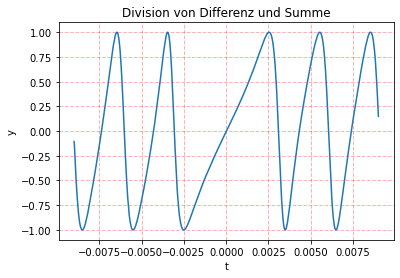

In [5]:
# Division berechnen
bias = 0
sig_shape = sig_1_re.shape
div = (sig_1_re - sig_2_re)/(sig_1_re + sig_2_re + bias)
plt.plot(t, div)
plt.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Division von Differenz und Summe')
plt.show()